# 클러스터링 유형 실습

### 학생 중간고사 성적에 따른 분류

### 라이브러리 선언 및 데이터 불러오기

In [2]:
import pandas as pd

# K-Means 라이브러리
from sklearn.cluster import KMeans

#CSV 파일을 읽어 DataFrame 변수에 저장하기
studentData = pd.read_csv("../dataset/student_middle.csv")
studentData.head()

,NAME,SW,DB,AND
0,ST0001,95,30,0
1,ST0002,50,50,0
2,ST0003,15,30,15
3,ST0004,90,50,20
4,ST0005,75,20,20


### (1) 타입통합 및 숫자컬럼 추가

In [4]:
featuresColumns = ["SW","DB","AND"]
### 특성정보 분리
name = studentData.loc[:,["NAME"]]
features = studentData.loc[:,featuresColumns]
print(name.shape)
print(features.shape)

(26, 1)
(26, 3)


### (2) 모델 선언

In [5]:
### 모델선언 및 feature 만 활용하여 자율학습 예측
model_method = KMeans(random_state=1, n_clusters=2) 
model = model_method.fit(features) 

### (3) 예측 (자율학습)

In [6]:
model.predict(features)

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

### 4. 데이터 정리

In [7]:
predict = pd.DataFrame(model.predict(features),
                      columns = ["PREDICT"])

### 원본데이터, predict 붙이기
result = pd.concat([studentData, predict], axis = 1)
result.head()

,NAME,SW,DB,AND,PREDICT
0,ST0001,95,30,0,0
1,ST0002,50,50,0,0
2,ST0003,15,30,15,0
3,ST0004,90,50,20,0
4,ST0005,75,20,20,0


### (5) 시각화

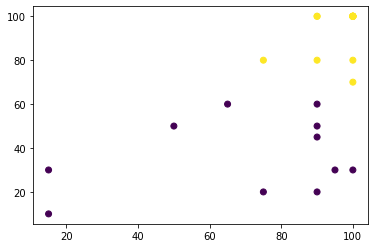

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(x=result.SW,
            y=result.DB,
            c=result.PREDICT)

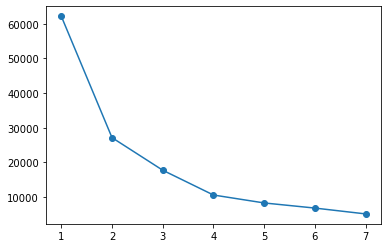

In [9]:
sse= []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(features)
    sse.append(km.inertia_)

plt.plot(range(1,8), sse, marker='o')

[실습]
다른 clustering 로직을 찾아보고
적용하세요.